## importing necessary libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## reading csv and manipulating dataframes

In [94]:
df = pd.read_csv('t20_batting_source.csv',usecols=['Player','Runs','4s','6s','Start_date'],parse_dates=['Start_date'])

nplayer = [x.split(" (")[0] for x in df["Player"]]
country = [ x.split("(")[1].split(")")[0]  for x in df["Player"]]
df["Player"] = nplayer
df["Country"] = country

df['Runs'] = df['Runs'].str.replace('*','')

df1 = df.set_index('Runs')
df2 = df1.drop(['DNB','TDNB','absent','sub']).reset_index()
cdf = df2.set_index('Country')
mdf = cdf.drop(['ICC','1','2','3']).reset_index()

mdf.to_csv('t20_modified.csv',index=False)

ndf = pd.read_csv('t20_modified.csv',dtype={'Runs':int,'4s':int,'6s':int})

ndf['50s'] = ndf['Runs'].between(50,99).replace({True:1,False:0})
ndf.head()

ddf = pd.DataFrame([['0AA', 'INDIA','1971-01', 0],
                    ['1AA', 'PAK', '1971-01', 0],
                    ['2AA', 'AUS',  '1971-01', 0],
                    ['3AA', 'SL', '1971-01', 0],
                    ['4AA', 'WI', '1971-01', 0],
                    ['5AA', 'ENG', '1971-01', 0],
                    ['6AA', 'SA', '1971-01', 0],
                    ['7AA', 'NZ', '1971-01', 0],
                   ['8AA', 'BDESH', '1971-01', 0],
                    ['9AA', 'AFG', '1971-01', 0]],
                  columns=['Player', 'Country', 'Start_date', 'Runs'])

adf = pd.concat([ddf,ndf],ignore_index=True,sort=False)

fdf = pd.read_csv('flags.csv')

bigdata = pd.merge(adf,fdf, on = "Country")
bigdata['Start_date'] = pd.to_datetime(bigdata['Start_date'])
bigdata.fillna(value=0,inplace = True)
bigdata.head()

summary = bigdata.groupby(['Player','Country'])['Runs','4s','6s','50s'].sum().sort_values('Runs',ascending=False)
summary.reset_index(inplace=True)
summary.head(10)

,Player,Country,Runs,4s,6s,50s
0,V Kohli,INDIA,2794,258.0,76.0,24.0
1,RG Sharma,INDIA,2773,245.0,127.0,21.0
2,MJ Guptill,NZ,2536,225.0,119.0,15.0
3,Shoaib Malik,PAK,2309,190.0,61.0,8.0
4,DA Warner,AUS,2207,214.0,89.0,17.0
5,BB McCullum,NZ,2140,199.0,91.0,13.0
6,EJG Morgan,ENG,2138,160.0,105.0,13.0
7,PR Stirling,IRE,2124,251.0,71.0,18.0
8,Mohammad Hafeez,PAK,1992,208.0,52.0,11.0
9,AJ Finch,AUS,1989,196.0,92.0,12.0


## Visualizations

In [95]:
sns.set_style('dark')

def plot_fig(col):
    plt.figure(figsize=(10,5))
    df = summary.sort_values(col,ascending=False).head(15)
    sns.barplot(data=df,y='Player',x=col,palette='muted')
    plt.title('Top 15 cricketers with highest ' + col + ' in T20s')

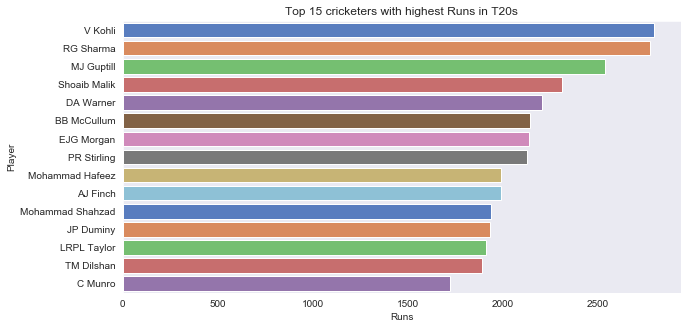

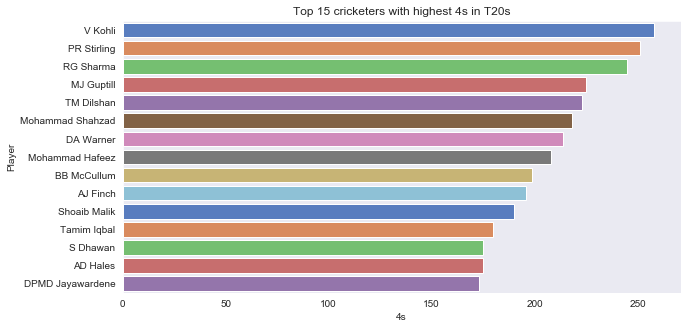

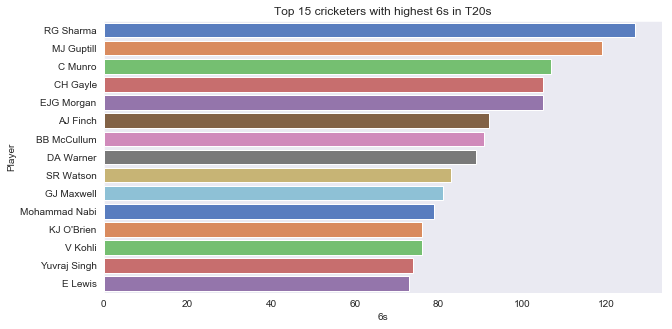

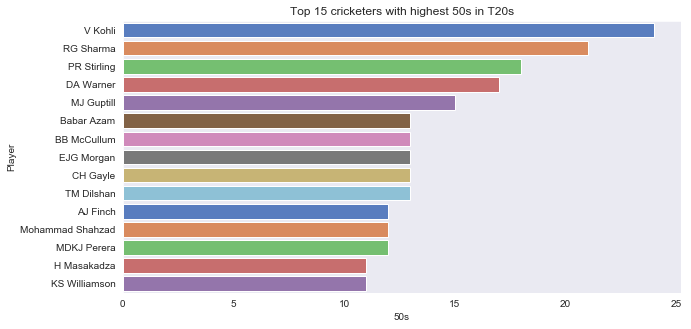

In [96]:
for col in ['Runs','4s','6s','50s']:
    plot_fig(col)

## Generating batting records (CSV files)

In [1]:
def final_csv(col):
    pivot_df = bigdata.pivot_table( index=["Player", "Country","Flags"], columns="Start_date", values = col)
    pivot_df.fillna(value=0,inplace = True)
    cum_df = pivot_df.cumsum(axis =1)
    cum_df.columns = cum_df.columns.year
    cum_df.to_csv('final_t20_'+col+'.csv')

runs = final_csv('Runs')

fours = final_csv('4s')

sixes = final_csv('6s')

fifties = final_csv('50s')